### GENDER ANALYSIS ###

In [2]:
import pandas as pd

In [61]:
df = pd.read_csv('exp4_intern.csv')
df.head()

,Path,True Label,Predicted Label
0,/home/cathyhou/dataset/guesswhat/ben_laplante@...,0,1
1,/home/cathyhou/dataset/guesswhat/_REVIEWED/rem...,0,1
2,/home/cathyhou/dataset/guesswhat/_REVIEWED/rem...,0,1
3,/home/cathyhou/dataset/guesswhat/_REVIEWED/rem...,0,1
4,/home/cathyhou/dataset/guesswhat/_REVIEWED/rem...,0,1


In [62]:
def extract_relevant_part(path):
    start = path.find('home/cathyhou/dataset/guesswhat/') + len('home/cathyhou/dataset/guesswhat/')
    end = len(path)
    #start = path.find('features_dinovitb/') + len('features_dinovitb/')
    #end = path.find('/features.npy')
    return path[start:end]

df['Path'] = df['Path'].apply(extract_relevant_part)
#df['Path'] = df['Path'] + '/GuessWhat.mp4'

In [63]:
df.head()

,Path,True Label,Predicted Label
0,ben_laplante@hotmail.com/1592151765/GuessWhat.mp4,0,1
1,_REVIEWED/remote_participants/justthink76%40ya...,0,1
2,_REVIEWED/remote_participants/justthink76%40ya...,0,1
3,_REVIEWED/remote_participants/jkuney8%40gmail....,0,1
4,_REVIEWED/remote_participants/jkuney8%40gmail....,0,1


In [64]:
df2 = pd.read_csv('dataset_1_clean.csv')
df2.rename(columns={'video_key': 'Path'}, inplace=True)
df2.head()

,Unnamed: 0,Path,child_id,ASD,age,gender
0,0,%2B07758486393/1637011476385/GuessWhat.mp4,+07758486393__daisy,1,0.0,Female
1,1,%2B07758486393/1637011774510/GuessWhat.mp4,+07758486393__daisy,1,0.0,Female
2,2,%2B07758486393/1637011884828/GuessWhat.mp4,+07758486393__daisy,1,0.0,Female
3,3,%2B07766544436/1626976603665/GuessWhat.mp4,+07766544436__andrew,1,11.0,Male
4,4,%2B07766544436/1626976728265/GuessWhat.mp4,+07766544436__andrew,1,11.0,Male


In [65]:
merged_df = pd.merge(df, df2, on='Path')
merged_df.head()

,Path,True Label,Predicted Label,Unnamed: 0,child_id,ASD,age,gender
0,ben_laplante@hotmail.com/1592151765/GuessWhat.mp4,0,1,1407,ben_laplante@hotmail.com__Silas,0,3.0,Male
1,_REVIEWED/remote_participants/justthink76%40ya...,0,1,940,justthink76@yahoo.com__Grayson,0,8.0,Male
2,_REVIEWED/remote_participants/justthink76%40ya...,0,1,941,justthink76@yahoo.com__Grayson,0,8.0,Male
3,_REVIEWED/remote_participants/jkuney8%40gmail....,0,1,935,jkuney8@gmail.com__Gabbie,0,5.0,Female
4,_REVIEWED/remote_participants/jkuney8%40gmail....,0,1,936,jkuney8@gmail.com__Gabbie,0,5.0,Female


In [66]:
# sanity check
len(merged_df.index) == len(df.index)

True

In [67]:
import numpy as np

# Functions to calculate metrics
def calculate_metrics(df):
    metrics = {}
    TP = np.sum((df['True Label'] == 1) & (df['Predicted Label'] == 1))
    TN = np.sum((df['True Label'] == 0) & (df['Predicted Label'] == 0))
    FP = np.sum((df['True Label'] == 0) & (df['Predicted Label'] == 1))
    FN = np.sum((df['True Label'] == 1) & (df['Predicted Label'] == 0))
    
    accuracy = (TP + TN) / len(df)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    false_positive_rate = FP / (FP + TN) if (FP + TN) > 0 else 0
    false_negative_rate = FN / (FN + TP) if (FN + TP) > 0 else 0
    selection_rate = np.sum(df['Predicted Label'] == 1) / len(df)
    count = len(df)
    
    metrics['accuracy'] = accuracy
    metrics['precision'] = precision
    metrics['false_positive_rate'] = false_positive_rate
    metrics['false_negative_rate'] = false_negative_rate
    metrics['selection_rate'] = selection_rate
    metrics['count'] = count
    
    return pd.Series(metrics)

# Calculate metrics for each gender
metrics_by_gender = merged_df.groupby('gender').apply(calculate_metrics).reset_index()

print(metrics_by_gender)


   gender  accuracy  precision  false_positive_rate  false_negative_rate  \
0  Female  0.285714   0.230769             0.909091             0.000000   
1    Male  0.769231   0.782609             0.714286             0.052632   

   selection_rate  count  
0        0.928571   14.0  
1        0.884615   26.0  


In [23]:
metrics_by_gender.to_csv('results/videomae/exp4_intern_by_gender.csv', index=False) 

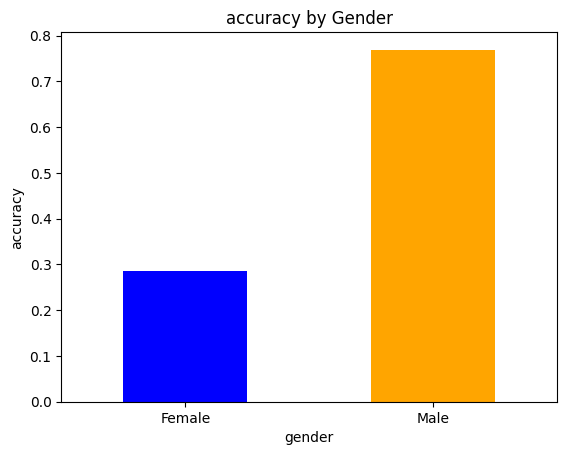

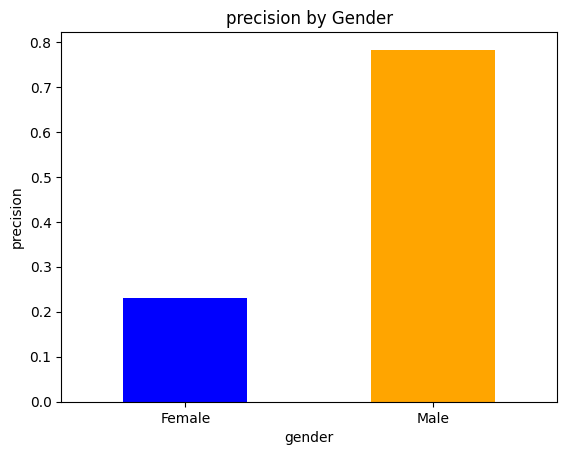

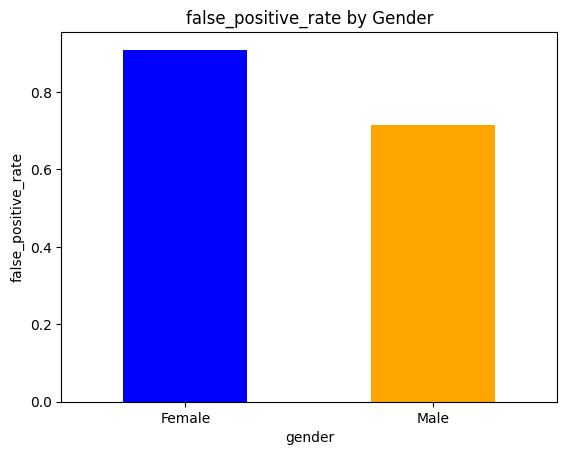

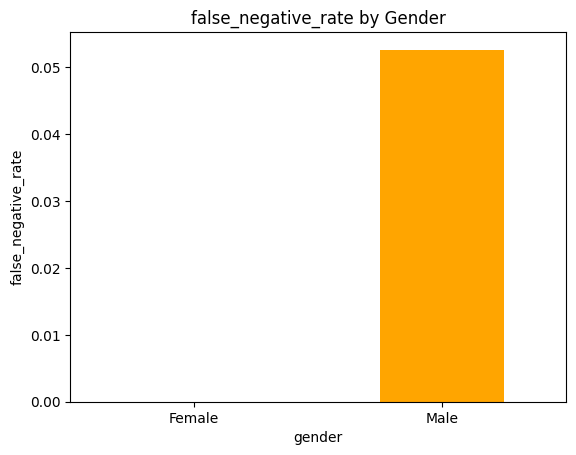

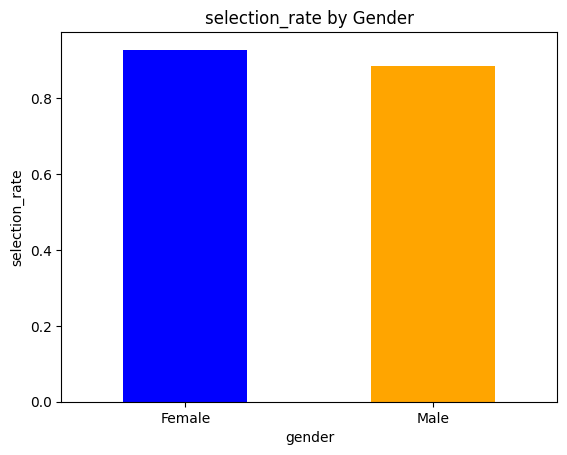

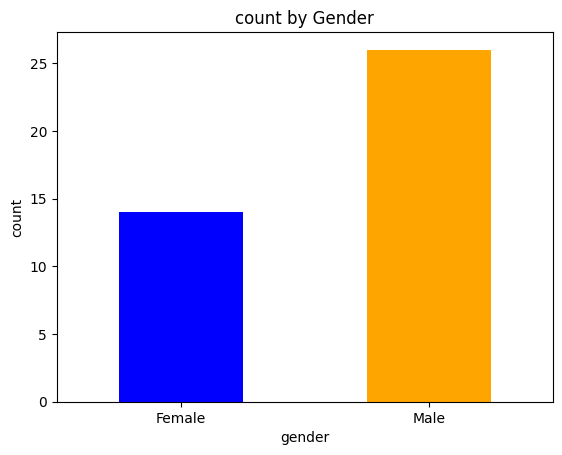

In [68]:
import matplotlib.pyplot as plt

# Plotting function
def plot_metrics(metrics_df, metric_name):
    metrics_df.set_index('gender')[metric_name].plot(kind='bar', color=['blue', 'orange'])
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} by Gender')
    plt.xticks(rotation=0)
    plt.savefig(f'results/videomae/exp4_intern_{metric_name}_by_gender.png')
    plt.show()

# Plot all metrics
metrics_list = ['accuracy', 'precision', 'false_positive_rate', 'false_negative_rate', 'selection_rate', 'count']

for metric in metrics_list:
    plot_metrics(metrics_by_gender, metric)


### AGE ANALYSIS ###

In [69]:
# Define age buckets
bins = [0, 3, 6, 9, float('inf')]
labels = ['0-3', '4-6', '7-9', '9+']
merged_df['Age Bucket'] = pd.cut(merged_df['age'], bins=bins, labels=labels, right=False)
merged_df.head()

,Path,True Label,Predicted Label,Unnamed: 0,child_id,ASD,age,gender,Age Bucket
0,ben_laplante@hotmail.com/1592151765/GuessWhat.mp4,0,1,1407,ben_laplante@hotmail.com__Silas,0,3.0,Male,4-6
1,_REVIEWED/remote_participants/justthink76%40ya...,0,1,940,justthink76@yahoo.com__Grayson,0,8.0,Male,7-9
2,_REVIEWED/remote_participants/justthink76%40ya...,0,1,941,justthink76@yahoo.com__Grayson,0,8.0,Male,7-9
3,_REVIEWED/remote_participants/jkuney8%40gmail....,0,1,935,jkuney8@gmail.com__Gabbie,0,5.0,Female,4-6
4,_REVIEWED/remote_participants/jkuney8%40gmail....,0,1,936,jkuney8@gmail.com__Gabbie,0,5.0,Female,4-6


In [70]:
metrics_by_age_bucket = merged_df.groupby('Age Bucket').apply(calculate_metrics).reset_index()
print(metrics_by_age_bucket)

  Age Bucket  accuracy  precision  false_positive_rate  false_negative_rate  \
0        0-3  1.000000   1.000000             0.000000             0.000000   
1        4-6  0.470588   0.437500             0.900000             0.000000   
2        7-9  0.500000   0.375000             0.714286             0.000000   
3         9+  0.800000   0.888889             1.000000             0.111111   

   selection_rate  count  
0        1.000000    6.0  
1        0.941176   17.0  
2        0.800000   10.0  
3        0.900000   10.0  


In [14]:
metrics_by_age_bucket.to_csv('results/dinov2/dinov2_by_age.csv', index=False) 

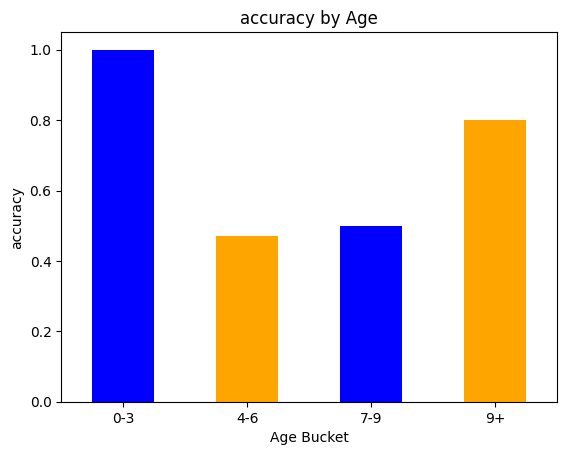

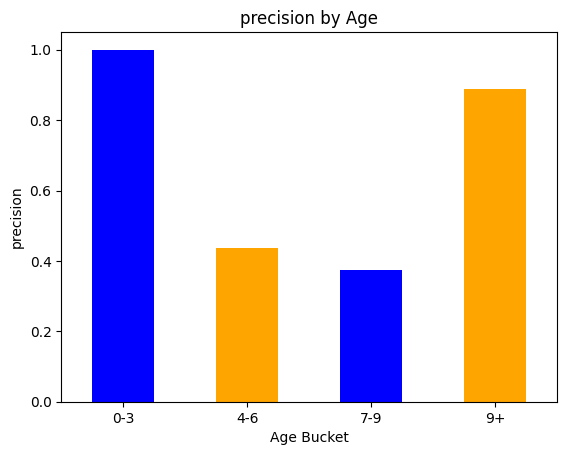

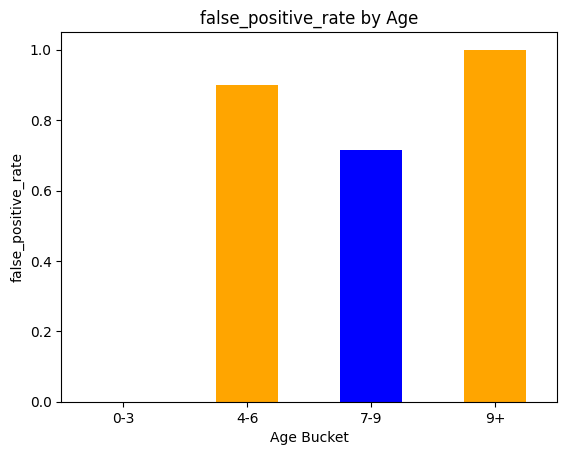

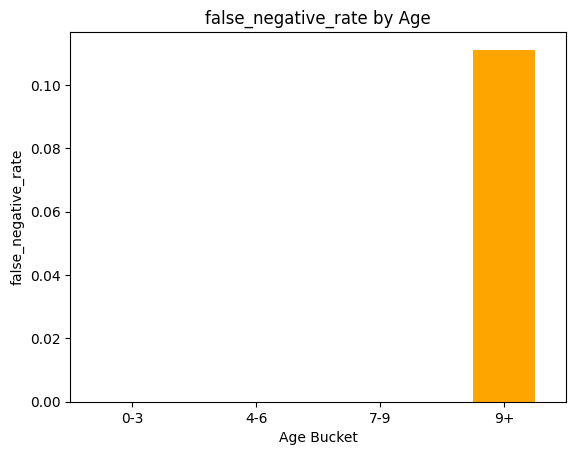

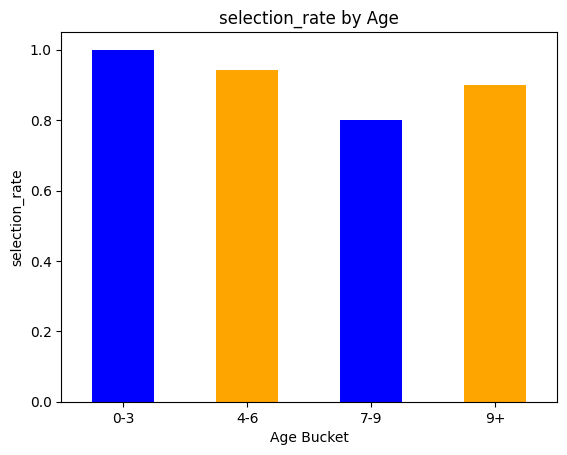

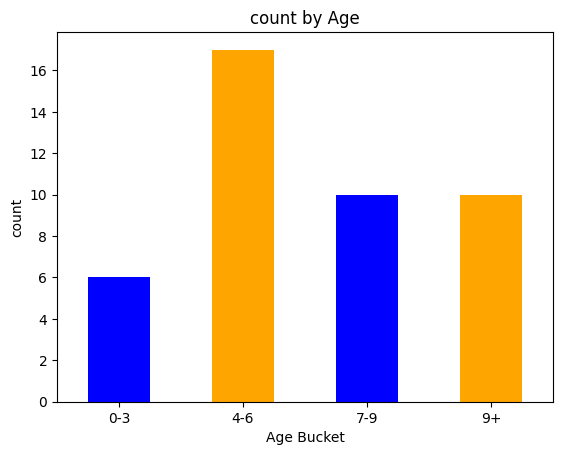

In [71]:
# Plotting function
def plot_metrics(metrics_df, metric_name):
    metrics_df.set_index('Age Bucket')[metric_name].plot(kind='bar', color=['blue', 'orange'])
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} by Age')
    plt.xticks(rotation=0)
    plt.savefig(f'results/videomae/exp4_intern_{metric_name}_by_age.png')
    plt.show()

metrics_list = ['accuracy', 'precision', 'false_positive_rate', 'false_negative_rate', 'selection_rate', 'count']

for metric in metrics_list:
    plot_metrics(metrics_by_age_bucket, metric)